#Project 1 by Chase Perry 
#Using Linear Regression To Estimate Global Average Land/Ocean Temperature By Year


The below block is used to 1. import the needed apis such as numpy, pandas, and files. This could probably be improved so the file doesn't need to be uploaded every time but it also also the data set to be changed out very easily (so long as it fits some other requirements).

In [0]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

uploaded = files.upload()

Saving p1_global_temp.csv to p1_global_temp (1).csv


This block reads the data file that's been passed in, converts it to a numpy array, and gets rid of any 'nan' values. Early on I had some issues with pandas reading over a dozen 'nan' values from the .csv and couldn't find what was causing them in the file. So, the last line with remove them from the array should any exist.

In [0]:
df = pd.read_csv('p1_global_temp.csv', usecols=[0, 1])
data = df.values
data = data[~np.isnan(data).any(axis=1)]

This below block defines some major functions needed throughout the rest of the project. 

plot_info uses two matrices to plot 3 major things. 1. Red X's mark as a scatterplot of global temperatures from 1880 to 2014. 2. A blue solid line to simply conect each of these points. 3. A solid green line which is the output of the various testing functions used to estimate the change in temperature from 1880 to 2014.

solve uses two lambda functions and two matrices to get the output of the estimation functions using the domain from the data set. 
f is used to produce the matrix of coefficients, which is needed is use numpys least squares function to get the best weights for the linear system.
> f is used to produce the matrix of coefficients, which is needed is use numpys least squares function to get the best weights for the linear system.

> s is used to produce ŷ, the estimation of the temperature (in Farenheit) but multiplying the weights by each x value (year) and summing the products.

> x is the domain, the matrix of years over which the observations occured. y is the matrix of temperature for each each.

loss is a simply function that simply takes in ŷ (the estimation) and y, then uses mean squared error to quantify how far off the model is from the actual temperatures.




In [0]:
def plot_info(data, test_output, name):
  fig, ax = plt.subplots(1, 1)
  ax.plot(data[:,0], data[:,1], 'xr')
  ax.plot(data[:,0], data[:,1], '-b')
  ax.plot(data[:,0], test_output, '-g')
  ax.set_xlabel('Year')
  ax.set_ylabel('Global Average Temperature (Fahrenheit)')
  ax.set_title('Global Average Temperatures from 1880 to 2013')
  ax.legend(('Scatterplot of Observations','Connection between each data point',name))

def solve(f, s, x, y):
  x = x[np.newaxis].T
  y = y[np.newaxis].T

  weights = np.linalg.lstsq(f(x), y, rcond=None)[0]

  test_output = s(x, weights)

  return test_output, weights

def loss(yhat, y):
  return np.sum((yhat - y)**2)/y.size

A number of the below blocks follow a similar style to this initial below block.

f# is a lambda function which produces a matrix of coefficients values used to produce the linear system for least squares. The matrix of years is expected as input and used to produce a matrix of the year to various powers depending on which function is used.

f#_full is another lambda function that takes the year matrix and weight matrix and produces one estimate of the temperature per year by summing the weights multiplied by the year to various powers. Again, these powers depend on the specific functions currently being examined.

f#_output is simply the models esitimation of the temperature using the above solve function. This is used with the plot_info function to plot the estimation over the actual data for better visualization.

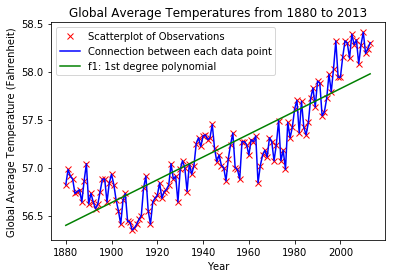

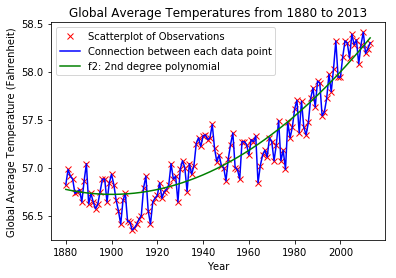

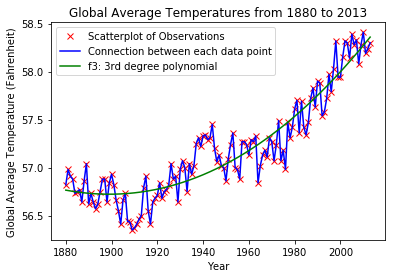

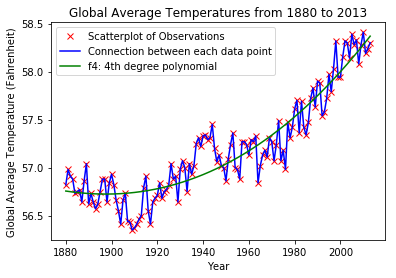

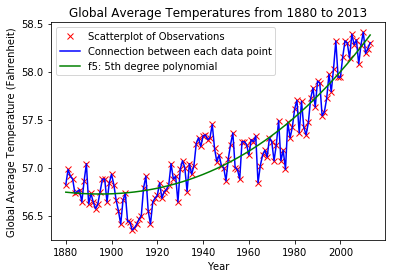

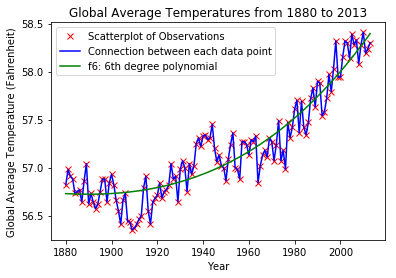

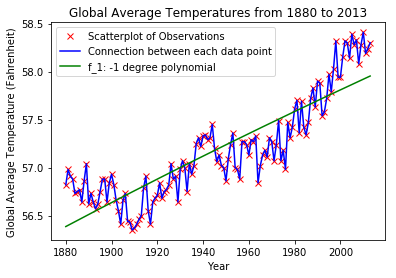

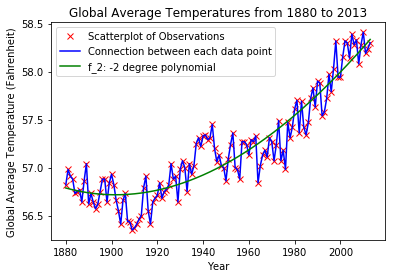

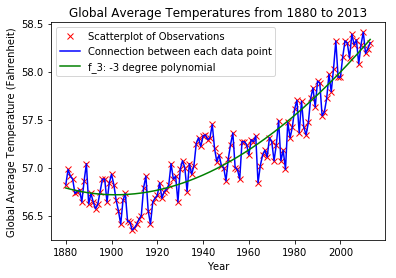

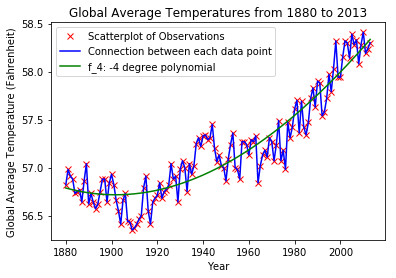

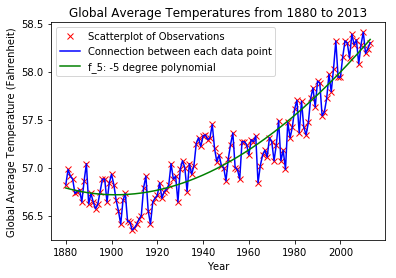

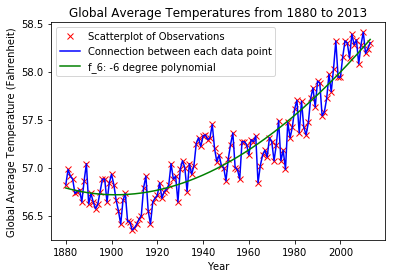

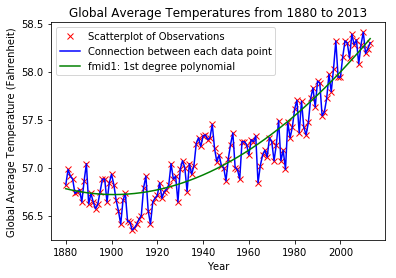

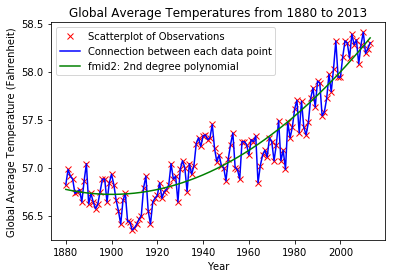

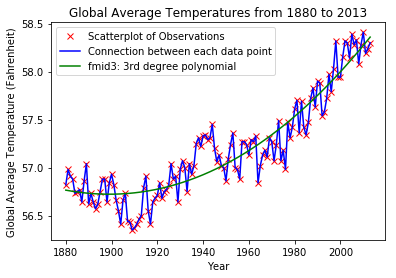

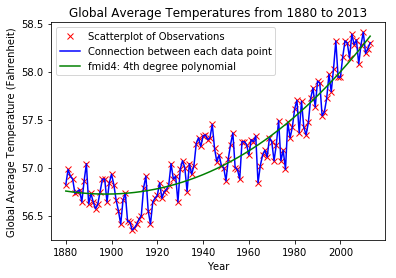

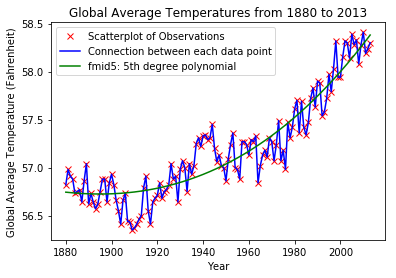

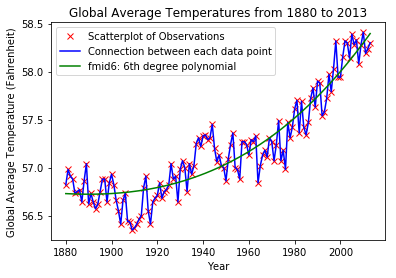

In [0]:
f1 = lambda x: np.power(x, [0, 1])
f1_full = lambda x, w: w[0,0] + w[1,0]*x

f1_output, f1_w = solve(f1, f1_full, data[:, 0], data[:,1])
plot_info(data, f1_output, 'f1: 1st degree polynomial')

##################################################################################################################

f2 = lambda x: np.power(x, [0, 1, 2])
f2_full = lambda x, w: w[0,0] + w[1,0]*x + w[2,0]*(x**2)

f2_output, f2_w = solve(f2, f2_full, data[:, 0], data[:,1])
plot_info(data, f2_output, 'f2: 2nd degree polynomial')

##################################################################################################################

f3 = lambda x: np.power(x, [0, 1, 2, 3])
f3_full = lambda x, w: w[0,0] + w[1,0]*x + w[2,0]*(x**2) + w[3,0]*(x**3)

f3_output, f3_w = solve(f3, f3_full, data[:, 0], data[:,1])
plot_info(data, f3_output, 'f3: 3rd degree polynomial')

##################################################################################################################

f4 = lambda x: np.power(x, [0,1,2,3,4])
f4_full = lambda x, w: w[0,0] + w[1,0]*x + w[2,0]*(x**2) + w[3,0]*(x**3) + w[4,0]*(x**4)

f4_output, f4_w = solve(f4, f4_full, data[:,0], data[:,1])
plot_info(data, f4_output, 'f4: 4th degree polynomial')

##################################################################################################################

f5 = lambda x: np.power(x, [0,1,2,3,4, 5])
f5_full = lambda x, w: w[0,0] + w[1,0]*x + w[2,0]*(x**2) + w[3,0]*(x**3) + w[4,0]*(x**4) + w[5,0]*(x**5)

f5_output, f5_w = solve(f5, f5_full, data[:,0], data[:,1])
plot_info(data, f5_output, 'f5: 5th degree polynomial')

##################################################################################################################

f6 = lambda x: np.power(x, [0,1,2,3,4, 5,6])
f6_full = lambda x, w: w[0,0] + w[1,0]*x + w[2,0]*(x**2) + w[3,0]*(x**3) + w[4,0]*(x**4) + w[5,0]*(x**5) + w[6,0]*(x**6)

f6_output, f6_w = solve(f6, f6_full, data[:,0], data[:,1])
plot_info(data, f6_output, 'f6: 6th degree polynomial')

##################################################################################################################

f_1 = lambda x: np.power(x, [0,-1])
f_1_full = lambda x, w: w[0,0] + w[1,0]*(x**-1)

f_1_output, f_1_w = solve(f_1, f_1_full, data[:,0], data[:,1])
plot_info(data, f_1_output, 'f_1: -1 degree polynomial')

##################################################################################################################

f_2 = lambda x: np.power(x, [0,-1, -2])
f_2_full = lambda x, w: w[0,0] + w[1,0]*(x**-1) + w[2,0]*(x**-2)

f_2_output, f_2_w = solve(f_2, f_2_full, data[:,0], data[:,1])
plot_info(data, f_2_output, 'f_2: -2 degree polynomial')

##################################################################################################################

f_3 = lambda x: np.power(x, [0,-1, -2, -3])
f_3_full = lambda x, w: w[0,0] + w[1,0]*(x**-1) + w[2,0]*(x**-2) + w[3,0]*(x**-3)

f_3_output, f_3_w = solve(f_3, f_3_full, data[:,0], data[:,1])
plot_info(data, f_3_output, 'f_3: -3 degree polynomial')

##################################################################################################################

f_4 = lambda x: np.power(x, [0,-1, -2, -3, -4])
f_4_full = lambda x, w: w[0,0] + w[1,0]*(x**-1) + w[2,0]*(x**-2) + w[3,0]*(x**-3) + w[4,0]*(x**-4)

f_4_output, f_4_w = solve(f_4, f_4_full, data[:,0], data[:,1])
plot_info(data, f_4_output, 'f_4: -4 degree polynomial')

##################################################################################################################

f_5 = lambda x: np.power(x, [0,-1, -2, -3, -4, -5])
f_5_full = lambda x, w: w[0,0] + w[1,0]*(x**-1) + w[2,0]*(x**-2) + w[3,0]*(x**-3) + w[4,0]*(x**-4) + w[5,0]*(x**-5)

f_5_output, f_5_w = solve(f_5, f_5_full, data[:,0], data[:,1])
plot_info(data, f_5_output, 'f_5: -5 degree polynomial')

##################################################################################################################

f_6 = lambda x: np.power(x, [0,-1, -2, -3, -4, -5, -6])
f_6_full = lambda x, w: w[0,0] + w[1,0]*(x**-1) + w[2,0]*(x**-2) + w[3,0]*(x**-3) + w[4,0]*(x**-4) + w[5,0]*(x**-5) + w[6,0]*(x**-6)

f_6_output, f_6_w = solve(f_6, f_6_full, data[:,0], data[:,1])
plot_info(data, f_6_output, 'f_6: -6 degree polynomial')

##################################################################################################################

fmid1 = lambda x: np.power(x, [0,-1, 1])
fmid1_full = lambda x, w: w[0,0] + w[1,0]*(x**-1) + w[2,0]*x

fmid1_output, fmid1_w = solve(fmid1, fmid1_full, data[:,0], data[:,1])
plot_info(data, fmid1_output, 'fmid1: 1st degree polynomial')

##################################################################################################################

fmid2 = lambda x: np.power(x, [0,-2, -1, 1, 2])
fmid2_full = lambda x, w: w[0,0] + w[1,0]*(x**-2) + w[2,0]*(x**-1) + w[3,0]*x + w[4,0]*(x**2)

fmid2_output, fmid2_w = solve(fmid2, fmid2_full, data[:,0], data[:,1])
plot_info(data, fmid2_output, 'fmid2: 2nd degree polynomial')

##################################################################################################################

fmid3 = lambda x: np.power(x, [0,-3,-2, -1, 1, 2, 3])
fmid3_full = lambda x, w: w[0,0] + w[1,0]*(x**-3) + w[2,0]*(x**-2) + w[3,0]*(x**-1) + w[4,0]*(x**1) + w[5,0]*(x**2) + w[6,0]*(x**3)

fmid3_output, fmid3_w = solve(fmid3, fmid3_full, data[:,0], data[:,1])
plot_info(data, fmid3_output, 'fmid3: 3rd degree polynomial')

##################################################################################################################

fmid4 = lambda x: np.power(x, [0,-4,-3,-2, -1, 1, 2,3,4])
fmid4_full = lambda x, w: w[0,0] + w[1,0]*(x**-4) + w[2,0]*(x**-3) + w[3,0]*(x**-2) + w[4,0]*(x**-1) + w[5,0]*(x**1) + w[6,0]*(x**2) + w[7,0]*(x**3) + w[8,0]*(x**4)

fmid4_output, fmid4_w = solve(fmid4, fmid4_full, data[:,0], data[:,1])
plot_info(data, fmid4_output, 'fmid4: 4th degree polynomial')

##################################################################################################################

fmid5 = lambda x: np.power(x, [0,-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])
fmid5_full = lambda x, w: w[0,0] + w[1,0]*(x**-5) + w[2,0]*(x**-4) + w[3,0]*(x**-3) + w[4,0]*(x**-2) + w[5,0]*(x**-1) + w[6,0]*(x**1) + w[7,0]*(x**2) + w[8,0]*(x**3) + w[9,0]*(x**4) + w[10,0]*(x**5)

fmid5_output, fmid5_w = solve(fmid5, fmid5_full, data[:,0], data[:,1])
plot_info(data, fmid5_output, 'fmid5: 5th degree polynomial')

##################################################################################################################

fmid6 = lambda x: np.power(x, [0, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6])
fmid6_full = lambda x, w: w[0,0] + w[1,0]*(x**-6) + w[2,0]*(x**-5) + w[3,0]*(x**-4) + w[4,0]*(x**-3) + w[5,0]*(x**-2) + w[6,0]*(x**-1) + w[7,0]*(x**1) + w[8,0]*(x**2) + w[9,0]*(x**3) + w[10,0]*(x**4) + w[11,0]*(x**5) + w[12,0]*(x**6)

fmid6_output, fmid6_w = solve(fmid6, fmid6_full, data[:,0], data[:,1])
plot_info(data, fmid6_output, 'fmid6: 6th degree polynomial')

##################################################################################################################

The next couple of blocks simply use the above MSE function called loss to calculate the MSE of the above functions. A dictionary is then used to determine which models had the best and worst errors, using some code from the following link to sort the dictionary by order of values.

https://thomas-cokelaer.info/blog/2017/12/how-to-sort-a-dictionary-by-values-in-python/

In [0]:
f1_loss = loss(f1_output, data[:,1][np.newaxis].T)
f2_loss = loss(f2_output, data[:,1][np.newaxis].T)
f3_loss = loss(f3_output, data[:,1][np.newaxis].T)
f4_loss = loss(f4_output, data[:,1][np.newaxis].T)
f5_loss = loss(f5_output, data[:,1][np.newaxis].T)
f6_loss = loss(f6_output, data[:,1][np.newaxis].T)
f_1_loss = loss(f_1_output, data[:,1][np.newaxis].T)
f_2_loss = loss(f_2_output, data[:,1][np.newaxis].T)
f_3_loss = loss(f_3_output, data[:,1][np.newaxis].T)
f_4_loss = loss(f_4_output, data[:,1][np.newaxis].T)
f_5_loss = loss(f_5_output, data[:,1][np.newaxis].T)
f_6_loss = loss(f_6_output, data[:,1][np.newaxis].T)
fmid1_loss = loss(fmid1_output, data[:,1][np.newaxis].T)
fmid2_loss = loss(fmid2_output, data[:,1][np.newaxis].T)
fmid3_loss = loss(fmid3_output, data[:,1][np.newaxis].T)
fmid4_loss = loss(fmid4_output, data[:,1][np.newaxis].T)
fmid5_loss = loss(fmid5_output, data[:,1][np.newaxis].T)
fmid6_loss = loss(fmid6_output, data[:,1][np.newaxis].T)

In [0]:
error = {'f1': f1_loss, 'f2': f2_loss, 'f3': f3_loss, 'f4': f4_loss, 'f5': f5_loss, 'f6': f6_loss, 
        'f_1': f_1_loss, 'f_2': f_2_loss, 'f_3': f_3_loss, 'f_4': f_4_loss, 'f_5': f_5_loss, 'f_6': f_6_loss, 
        'fmid1': fmid1_loss, 'fmid2': fmid2_loss, 'fmid3': fmid3_loss, 'fmid4': fmid4_loss, 'fmid5': fmid5_loss, 'fmid6': fmid6_loss}

error2 = sorted(error.items(), key = operator.itemgetter(1))
print('Model with the least amount of error (using MSE): ', error2[0])
print('Model with greatest error (using MSE): ', error2[len(error2)-1])

Model with the least amount of error (using MSE):  ('fmid5', 0.037672668064722734)
Model with greatest error (using MSE):  ('f_1', 0.06997953839207752)


The following blocks use data from NOAA and models created with the above functions and data to make predictions for the 2014-2018. These years were not included in the original data used to make the models, so the predictions are purely based on what was found to best best to model 1880-2013.

In [0]:
new_data = np.array([[2014, 58.24],
                     [2015, 58.62],
                     [2016, 57.94],
                     [2017, 58.51],
                     [2018, 58.42]])

f1_p = f1_full(new_data[:,0][np.newaxis].T, f1_w)
f2_p = f2_full(new_data[:,0][np.newaxis].T, f2_w)
f3_p = f3_full(new_data[:,0][np.newaxis].T, f3_w)
f4_p = f4_full(new_data[:,0][np.newaxis].T, f4_w)
f5_p = f5_full(new_data[:,0][np.newaxis].T, f5_w)
f6_p = f6_full(new_data[:,0][np.newaxis].T, f6_w)
f_1_p = f_1_full(new_data[:,0][np.newaxis].T, f_1_w)
f_2_p = f_2_full(new_data[:,0][np.newaxis].T, f_2_w)
f_3_p = f_3_full(new_data[:,0][np.newaxis].T, f_3_w)
f_4_p = f_4_full(new_data[:,0][np.newaxis].T, f_4_w)
f_5_p = f_5_full(new_data[:,0][np.newaxis].T, f_5_w)
f_6_p = f_6_full(new_data[:,0][np.newaxis].T, f_6_w)
fmid1_p = fmid1_full(new_data[:,0][np.newaxis].T, fmid1_w)
fmid2_p = fmid2_full(new_data[:,0][np.newaxis].T, fmid2_w)
fmid3_p = fmid3_full(new_data[:,0][np.newaxis].T, fmid3_w)
fmid4_p = fmid4_full(new_data[:,0][np.newaxis].T, fmid4_w)
fmid5_p = fmid5_full(new_data[:,0][np.newaxis].T, fmid5_w)
fmid6_p = fmid6_full(new_data[:,0][np.newaxis].T, fmid6_w)

f1p_loss = loss(f1_p, new_data[:,1][np.newaxis].T)
f2p_loss = loss(f2_p, new_data[:,1][np.newaxis].T)
f3p_loss = loss(f3_p, new_data[:,1][np.newaxis].T)
f4p_loss = loss(f4_p, new_data[:,1][np.newaxis].T)
f5p_loss = loss(f5_p, new_data[:,1][np.newaxis].T)
f6p_loss = loss(f6_p, new_data[:,1][np.newaxis].T)
f_1p_loss = loss(f_1_p, new_data[:,1][np.newaxis].T)
f_2p_loss = loss(f_2_p, new_data[:,1][np.newaxis].T)
f_3p_loss = loss(f_3_p, new_data[:,1][np.newaxis].T)
f_4p_loss = loss(f_4_p, new_data[:,1][np.newaxis].T)
f_5p_loss = loss(f_5_p, new_data[:,1][np.newaxis].T)
f_6p_loss = loss(f_6_p, new_data[:,1][np.newaxis].T)
fmid1p_loss = loss(fmid1_p, new_data[:,1][np.newaxis].T)
fmid2p_loss = loss(fmid2_p, new_data[:,1][np.newaxis].T)
fmid3p_loss = loss(fmid3_p, new_data[:,1][np.newaxis].T)
fmid4p_loss = loss(fmid4_p, new_data[:,1][np.newaxis].T)
fmid5p_loss = loss(fmid5_p, new_data[:,1][np.newaxis].T)
fmid6p_loss = loss(fmid6_p, new_data[:,1][np.newaxis].T)

This last block sorts the functions based on their errors (using MSE) in respect to the data obtained from 2014-2018.

In [0]:
prediction_error = {'f1': f1p_loss, 'f2': f2p_loss, 'f3': f3p_loss, 'f4': f4p_loss, 'f5': f5p_loss, 'f6': f6p_loss, 
                    'f_1': f_1p_loss, 'f_2': f_2p_loss, 'f_3': f_3p_loss, 'f_4': f_4p_loss, 'f_5': f_5p_loss, 'f_6': f_6p_loss, 
                    'fmid1': fmid1p_loss, 'fmid2': fmid2p_loss, 'fmid3': fmid3p_loss, 'fmid4': fmid4p_loss, 'fmid5': fmid5p_loss, 'fmid6': fmid6p_loss}

prediction_error2 = sorted(prediction_error.items(), key = operator.itemgetter(1))

print('The model with the best prediction based off of MSE is:', prediction_error2[0])
print('The model with the worst prediction based off of MSE is:', prediction_error2[len(prediction_error2)-1])

The model with the best prediction based off of MSE is: ('f_3', 0.060715445843080654)
The model with the worst prediction based off of MSE is: ('f_1', 0.18494240480209606)


In [0]:
print(error2)
print(prediction_error2)

[('fmid5', 0.037672668064722734), ('f5', 0.03767266806472448), ('fmid6', 0.03768453370619584), ('f6', 0.03768453370620328), ('fmid4', 0.03770228414724408), ('f4', 0.03770228414724616), ('fmid3', 0.037749166443987466), ('f3', 0.03774916644423895), ('f2', 0.037803797635759376), ('fmid2', 0.03780379768112865), ('fmid1', 0.03786616567631745), ('f_2', 0.03794298525533085), ('f_4', 0.03794298531790155), ('f_5', 0.03794298531790155), ('f_6', 0.03794298531790155), ('f_3', 0.037942985317903986), ('f1', 0.0671296572871995), ('f_1', 0.06997953839207752)]
[('f_3', 0.060715445843080654), ('f_4', 0.06071544584309663), ('f_5', 0.06071544584309663), ('f_6', 0.06071544584309663), ('f_2', 0.060715447041185346), ('fmid1', 0.06236022013691904), ('fmid2', 0.06414825875491446), ('f2', 0.06414826036521622), ('fmid3', 0.06628888050446528), ('f3', 0.0662889905735338), ('f4', 0.06909630856497871), ('fmid4', 0.06909630891091549), ('f5', 0.07302037826574766), ('fmid5', 0.07302037826615486), ('fmid6', 0.0787049344

This final block plots a point for each function in the "regular" polynomial set and each function in the "mixed" polynomial set to show the relation between how well the model fit the original data versus its success in predicting the new data. The models from the "inverse" polynomial set were not plotted because their predictions were all so close that the differences were about 0. f1 and fmid1 were not plotted because they consistently ranked last so they were excluded.

Text(0.5, 1.0, 'Comparison of Models Matching Original Data VS. New Data ("Mixed" Polynomials)')

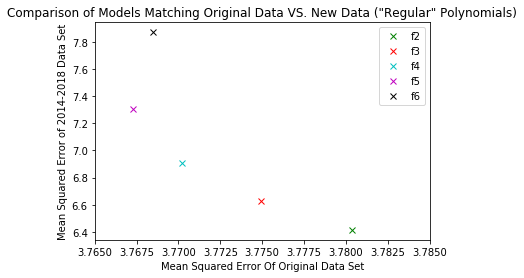

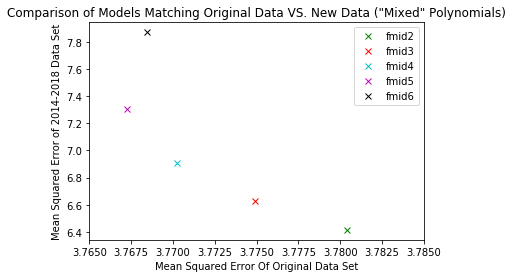

In [0]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(3.765, 3.785)
ax.plot(error['f2']*100, prediction_error['f2']*100, 'xg')
ax.plot(error['f3']*100, prediction_error['f3']*100, 'xr')
ax.plot(error['f4']*100, prediction_error['f4']*100, 'xc')
ax.plot(error['f5']*100, prediction_error['f5']*100, 'xm')
ax.plot(error['f6']*100, prediction_error['f6']*100, 'xk')
ax.set_xlabel('Mean Squared Error Of Original Data Set')
ax.set_ylabel('Mean Squared Error of 2014-2018 Data Set')
ax.legend(('f2', 'f3', 'f4', 'f5', 'f6'))
ax.set_title('Comparison of Models Matching Original Data VS. New Data ("Regular" Polynomials)')

#################################################################################################

fig, ax = plt.subplots(1, 1)
ax.set_xlim(3.765, 3.785)
ax.plot(error['fmid2']*100, prediction_error['fmid2']*100, 'xg')
ax.plot(error['fmid3']*100, prediction_error['fmid3']*100, 'xr')
ax.plot(error['fmid4']*100, prediction_error['fmid4']*100, 'xc')
ax.plot(error['fmid5']*100, prediction_error['fmid5']*100, 'xm')
ax.plot(error['fmid6']*100, prediction_error['fmid6']*100, 'xk')
ax.set_xlabel('Mean Squared Error Of Original Data Set')
ax.set_ylabel('Mean Squared Error of 2014-2018 Data Set')
ax.legend(('fmid2', 'fmid3', 'fmid4', 'fmid5', 'fmid6'))
ax.set_title('Comparison of Models Matching Original Data VS. New Data ("Mixed" Polynomials)')